In [52]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator

In [53]:
#An usage of Bell States(and entangled states in general) are in Quantum Teleportation:
#Quantum Teleportation is a form in quantum physics to trasfer information without physically moving matter
#This is possible if we have 2 entangled qubits(also called Alice and Bob in this case) and a third qubit with the state what we want to teleportate
#So we abuse of natural behavior of entangled states
#And with some measurements, operations and classical comunication, to make possible to recreate the state of a qubit in another local
#Let's see how to make it in qiskit:

In [54]:
#Disclaimer 1, the name Alice and Bob originate from a analogy history where:
#Alice and Bob share 2 entangled qubits, so Alice have qubit1 and Bob have qubit2
#Alice want to send to Bob the state of a third qubit to Bob, but she doesn't have how to do it phisically, so she will use quantum teleportarion
#So here we will name:
#Alice and Bob: our 2 entangled qubits
#Alice: the qubit of entanglement, which is what the person who wants to transfer information has
#Info: the qubit what we want to teleportate
#Bob: the qubit what will recive the information
#Call: a classical register to store the measure of Alice and Info, we need this to know what gate apply in the end

In [55]:
#Disclaimer 2, in determined point, we will have 4 possible states for Bob, so we will have to apply some gates depending of the state what we got
#If we measure I as 1, we need to apply Z gate
#If we measure A as 1, we need to apply X gate
#If both 1, we apply Z and X gate
#Else, we don't apply any gate

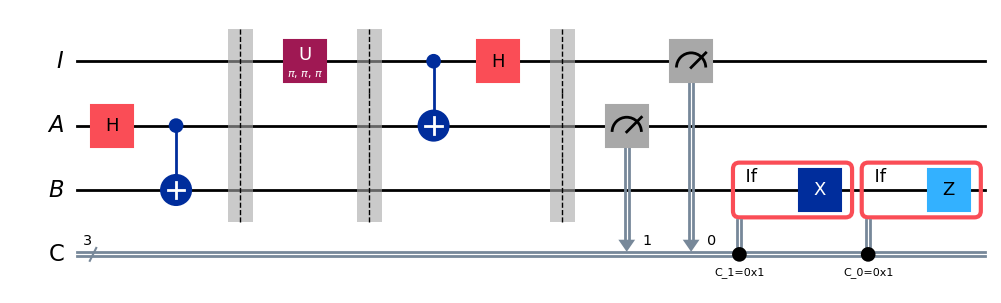

In [56]:
#So first, let's define our situation
Alice = QuantumRegister(1, "A") #size 1, because we will use 1 qubit for each, and the name is just to facilite the visualization
Bob = QuantumRegister(1, "B")
Info = QuantumRegister(1, "I")
Call = ClassicalRegister(3, "C")
qc = QuantumCircuit(Info, Alice, Bob, Call)

#Second step, we entangle Alice and Bob qubits, in that case, we use the bell state |φ+⟩
qc.h(Alice)
qc.cx(Alice, Bob)
qc.barrier() #Barrier just for make more easier to visualizate

#Third step, let's define a random state for Info, that's just a example, Info can e any state
qc.u(np.pi, np.pi, np.pi, Info)
qc.barrier()

#Fourth step, we entangle Info with Alice qubit
qc.cx(Info, Alice)
qc.h(Info)
qc.barrier()

#Now we measure Alice and Info in our Call
qc.measure(Alice, Call[1])
qc.measure(Info, Call[0])

#To finish, we apply the mentioned condicional gates(see disclaimer 2)
with qc.if_test((Call[1], 1)):
    qc.x(Bob)
with qc.if_test((Call[0], 1)):
    qc.z(Bob)

qc.draw('mpl')

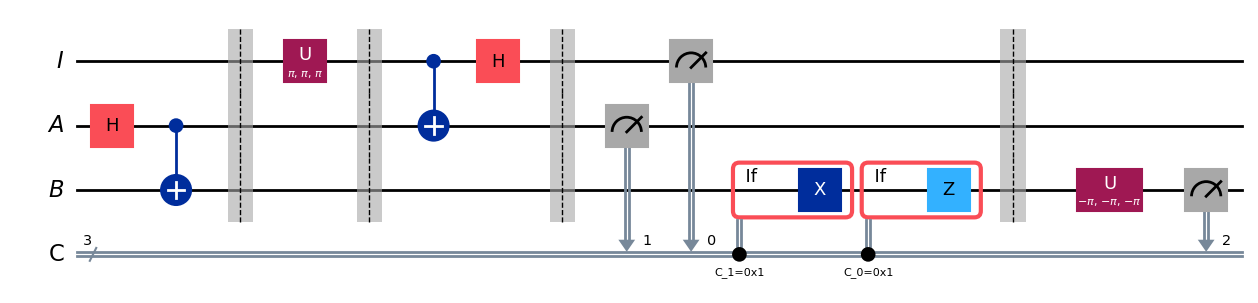

In [57]:
#Now, to comprove we have sucefully teloported our state, we can apply the inverse gate to our qubit what recived the state
qc.barrier()
qc.u(np.pi, np.pi, np.pi, Bob).inverse() #same gate but inversed
qc.measure(Bob, Call[2]) #expected measure 0
qc.draw('mpl')

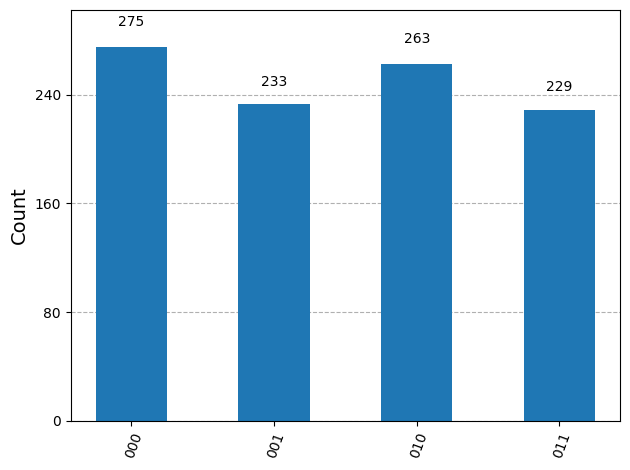

In [58]:
#Second step, we simulate our circuit and see if the teleportation worked
sim = AerSimulator() #using AerSimulator because BasicSimulator doesn't support circuits with condicional gates
result = sim.run(qc, shots=1000).result()
counts = result.get_counts()

#And let's use a histogram to a easy visualization
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [60]:
#Here we got 4 states: |000⟩ | |001⟩ | |010⟩ | |011⟩, what represent the measure of our 3 qubits in that order: |Bob/Alice/Info⟩
#So the first number represent Bob state, and as expected it is always 0
#So our teleportation worked well

In [61]:
#Disclaimer 3: With some interference elements, sometimes Bob can get measured as a unexpected state, so we need to analysis that in each enviroment first